<a href="https://colab.research.google.com/github/Trinadhreddy11/respiratory-sound-ml/blob/main/Respiratory_sound%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

pip install spafe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.4 MB/s eta 0:00:00


In [ ]:
import os

import wave
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf
from scipy.io import wavfile
from scipy.signal import resample

import librosa
import librosa.display




import spafe
from spafe.utils import vis
from spafe.features.gfcc import gfcc


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio_data = '/content/drive/MyDrive/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'

In [ ]:
diagnosis_df = pd.read_csv(r"/content/drive/MyDrive/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv", names=['patient_id', 'disease'])
"""diagnosis_df.head(10)
unique_diseases = diagnosis_df['disease'].unique()
print(unique_diseases)"""

"diagnosis_df.head(10)\nunique_diseases = diagnosis_df['disease'].unique()\nprint(unique_diseases)"

Data Preprocessing

In [ ]:
import os
from scipy.signal import butter, filtfilt
from scipy.io import wavfile
import librosa
import numpy as np

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


def process_wav_files(directory, output_folder, lowcut, highcut, order=5):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over each WAV file in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            # Load audio data

            file_path = os.path.join(directory, filename)
            data, sr = librosa.load(file_path)

            # Apply the bandpass filter
            filtered_data = butter_bandpass_filter(data, lowcut, highcut, sr, order=order)

            # Construct the output file path
            filtered_file_path = os.path.join(output_folder,  filename)


            # Save the filtered data to a new WAV file in the output folder
            wavfile.write(filtered_file_path, sr, filtered_data.astype(np.float32))

            print(f"Filtered file saved: {filtered_file_path}")

# Directory containing the WAV files
directory = "/content/drive/MyDrive/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files"

# Output folder for filtered files
output_folder = "/content/drive/MyDrive/Respiratory_Sound_Database/Filtered_Audio_Files"

# Define the bandpass filter parameters
lowcut = 50  # Low cutoff frequency (Hz)
highcut = 2000  # High cutoff frequency (Hz)
order = 6  # Filter order

# Process the WAV files in the directory and save filtered files to the output folder
process_wav_files(directory, output_folder, lowcut, highcut, order)

Filtered file saved: /content/drive/MyDrive/Respiratory_Sound_Database/Filtered_Audio_Files/160_1b3_Pr_mc_AKGC417L.wav
Filtered file saved: /content/drive/MyDrive/Respiratory_Sound_Database/Filtered_Audio_Files/160_1b3_Lr_mc_AKGC417L.wav
Filtered file saved: /content/drive/MyDrive/Respiratory_Sound_Database/Filtered_Audio_Files/160_1b4_Lr_mc_AKGC417L.wav
Filtered file saved: /content/drive/MyDrive/Respiratory_Sound_Database/Filtered_Audio_Files/160_1b4_Ar_mc_AKGC417L.wav
Filtered file saved: /content/drive/MyDrive/Respiratory_Sound_Database/Filtered_Audio_Files/160_1b3_Tc_mc_AKGC417L.wav
Filtered file saved: /content/drive/MyDrive/Respiratory_Sound_Database/Filtered_Audio_Files/160_1b3_Al_mc_AKGC417L.wav
Filtered file saved: /content/drive/MyDrive/Respiratory_Sound_Database/Filtered_Audio_Files/160_1b3_Pl_mc_AKGC417L.wav
Filtered file saved: /content/drive/MyDrive/Respiratory_Sound_Database/Filtered_Audio_Files/160_2b4_Pl_mc_AKGC417L.wav
Filtered file saved: /content/drive/MyDrive/Resp

Data Augmentation

In [ ]:
def add_noise(data, noise_level):
    return data

def shift(data, shift_samples):
    return data

def stretch(data, rate):
    data_stretched = librosa.effects.time_stretch(data, rate=rate)
    return data_stretched

def pitch_shift(data, semitones):
    return data

In [ ]:
def show_audio(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y, 0.0008)
    y_shift = shift(y, 3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)

    plt.figure(figsize=(20, 8))

    plt.subplot(3, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('original')

    plt.subplot(3, 2, 2)
    librosa.display.waveshow(y_noise, sr=sr)
    plt.title('noise')

    plt.subplot(3, 2, 3)
    librosa.display.waveshow(y_shift, sr=sr)
    plt.title('shift')

    plt.subplot(3, 2, 4)
    librosa.display.waveshow(y_stretch_1, sr=sr)
    plt.title('stretch 1')

    plt.subplot(3, 2, 5)
    librosa.display.waveshow(y_stretch_2, sr=sr)
    plt.title('stretch 2')

    plt.subplot(3, 2, 6)
    librosa.display.waveshow(y_pitch_shift, sr=sr)
    plt.title('pitch shift')

    plt.tight_layout()

In [ ]:
def show_audio_features(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y , 0.0008)
    y_shift = shift(y,3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)

    y = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    y_noise = librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=50)
    y_shift = librosa.feature.mfcc(y=y_shift, sr=sr, n_mfcc=50)
    y_stretch_1 = librosa.feature.mfcc(y=y_stretch_1, sr=sr, n_mfcc=50)
    y_stretch_2 = librosa.feature.mfcc(y=y_stretch_2, sr=sr, n_mfcc=50)
    y_pitch_shift = librosa.feature.mfcc(y=y_pitch_shift, sr=sr, n_mfcc=50)

    plt.figure(figsize=(20, 8))

    plt.subplot(3,2,1)
    librosa.display.specshow(librosa.power_to_db(y,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('orginal')

    plt.subplot(3,2,2)
    librosa.display.specshow(librosa.power_to_db(y_noise,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('noise')

    plt.subplot(3,2,3)
    librosa.display.specshow(librosa.power_to_db(y_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('shift')

    plt.subplot(3,2,4)
    librosa.display.specshow(librosa.power_to_db(y_stretch_1,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('stretch 1')

    plt.subplot(3,2,5)
    librosa.display.specshow(librosa.power_to_db(y_stretch_2,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('stretch 2')

    plt.subplot(3,2,6)
    librosa.display.specshow(librosa.power_to_db(y_pitch_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('pitch shift')



    plt.tight_layout()


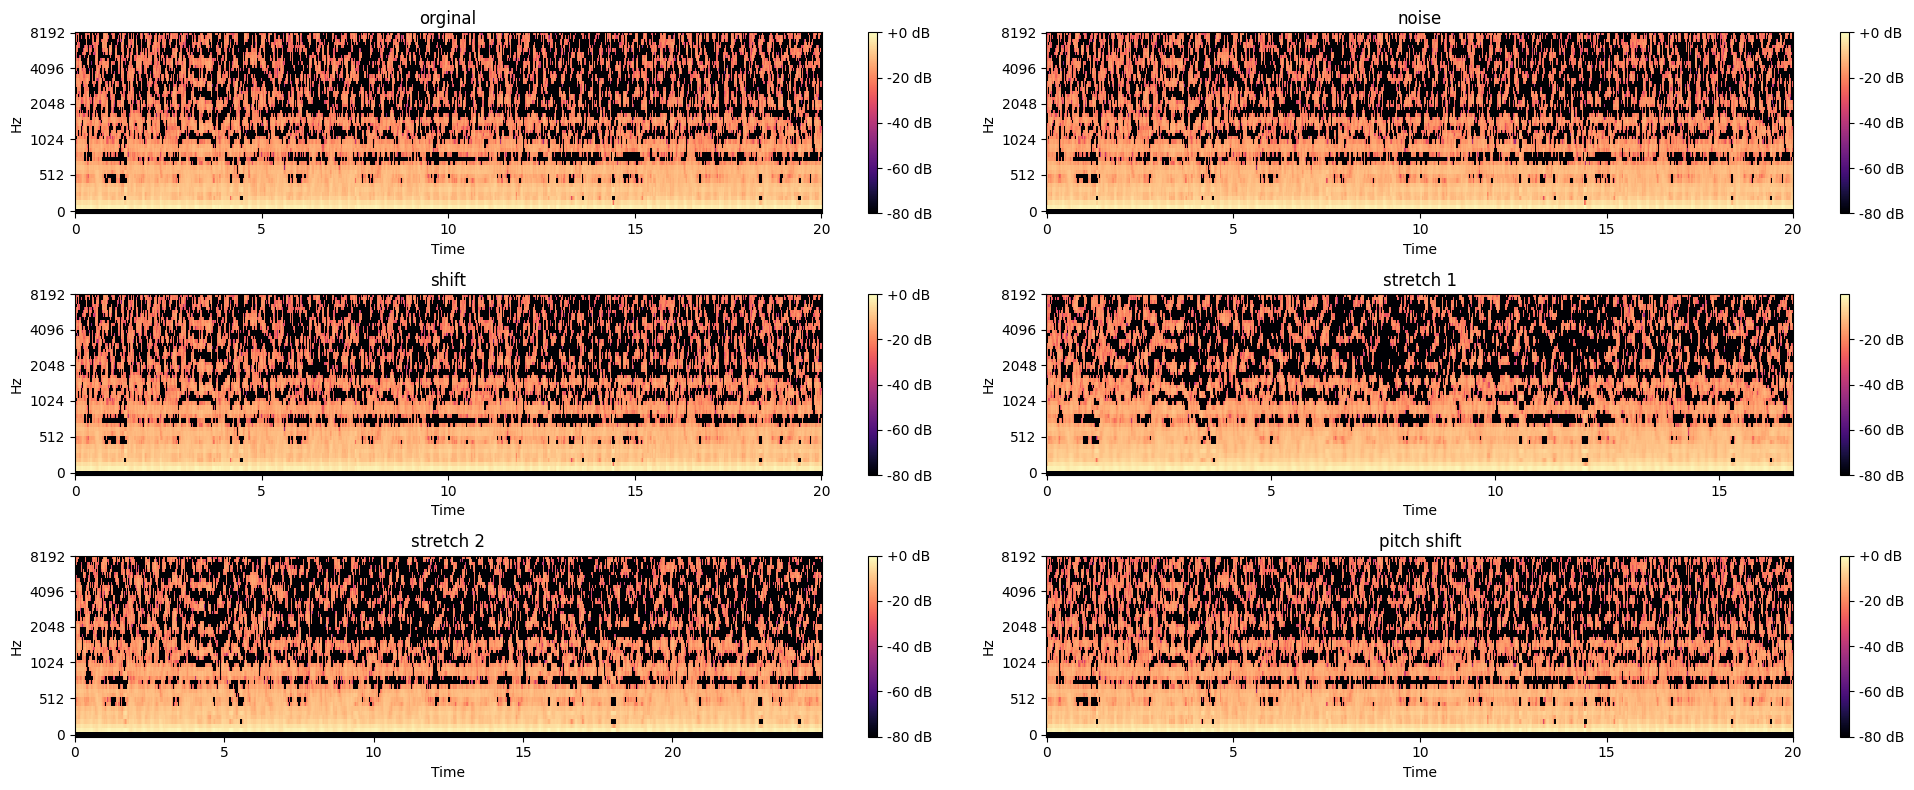

In [ ]:
show_audio_features("/content/drive/MyDrive/Respiratory_Sound_Database/Filtered_Audio_Files/101_1b1_Al_sc_Meditron.wav")

In [ ]:
!pip install librosa --upgrade


Feature Extraction

In [ ]:
def mfccs_feature_exteraction(dir_):
    X_=[]
    y_=[]

    COPD=[]
    copd_count=0

    data = diagnosis_df
    features = 52

    for soundDir in (os.listdir(dir_)):
        if soundDir[-3:]=='wav'and soundDir[:3]!='103'and soundDir[:3]!='108'and soundDir[:3]!='115':

            p = list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0]
            if (p=='COPD'):
                if (soundDir[:6] in COPD) and copd_count<2:
                    data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    COPD.append(soundDir[:6])
                    copd_count+=1
                    X_.append(mfccs)
                    y_.append(list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0])

                if (soundDir[:6] not in COPD):
                    data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    COPD.append(soundDir[:6])
                    copd_count=0
                    X_.append(mfccs)
                    y_.append(list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0])

            if (p!='COPD'):
                if ((p == 'Bronchiectasis') or (p == 'Bronchiolitis')):
                    data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs)
                    y_.append('Bronchiolitis')

                    data_noise = add_noise(data_x,0.001)
                    mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_noise)
                    y_.append('Bronchiolitis')

                    data_shift = shift(data_x,1600)
                    mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_shift)
                    y_.append('Bronchiolitis')

                    data_stretch = stretch(data_x,1.2)
                    mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch)
                    y_.append('Bronchiolitis')

                    data_stretch_2 = stretch(data_x,0.8)
                    mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch_2)
                    y_.append('Bronchiolitis')

                    data_pitch_shift = pitch_shift(data_x,3)
                    mfccs_stretch = np.mean(librosa.feature.melspectrogram(y=data_pitch_shift, sr=sampling_rate, n_mels=features).T,axis=0)
                    X_.append(mfccs_stretch)
                    y_.append('Bronchiolitis')

                else:
                    data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs)
                    y_.append(list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0])

                    data_noise = add_noise(data_x,0.001)
                    mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_noise)
                    y_.append(p)

                    data_shift = shift(data_x,1600)
                    mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_shift)
                    y_.append(p)

                    data_stretch = stretch(data_x,1.2)
                    mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch)
                    y_.append(p)

                    data_stretch_2 = stretch(data_x,0.8)
                    mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch_2)
                    y_.append(p)

                    data_pitch_shift = pitch_shift(data_x,3)
                    mfccs_stretch = np.mean(librosa.feature.melspectrogram(y=data_pitch_shift, sr=sampling_rate, n_mels=features).T,axis=0)
                    X_.append(mfccs_stretch)
                    y_.append(p)



    X_data = np.array(X_)
    y_data = np.array(y_)


    return X_data, y_data

In [ ]:
audio_data = '/content/drive/MyDrive/Respiratory_Sound_Database/Filtered_Audio_Files/'
x_mfccs, y = mfccs_feature_exteraction(audio_data)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Respiratory_Sound_Database/audio_and_txt_files/'

In [ ]:
y_data_encode = y.reshape(y.shape[0],1)
y_data_encode = np.where(y_data_encode == 'COPD',np.array([1,0,0,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Bronchiolitis',np.array([0,1,0,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Pneumonia',np.array([0,0,1,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'URTI',np.array([0,0,0,1,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Healthy',np.array([0,0,0,0,1]).reshape(1,5) , y_data_encode)

Y_data = y_data_encode.astype('float64')

In [ ]:
mfccs_features = np.array(x_mfccs)
lables = np.array(Y_data)

mfccs_features.shape , lables.shape

((1036, 52), (1036, 5))

In [ ]:
from sklearn.model_selection import train_test_split
mfcc_train, mfcc_val, lables_train, lables_val  = train_test_split(mfccs_features, lables, test_size=0.175, random_state=10)
mfcc_train, mfcc_test, lables_train, lables_test = train_test_split(mfcc_train, lables_train, test_size=0.075, random_state=10)

print (mfcc_train.shape, mfcc_val.shape, mfcc_test.shape)
print (lables_train.shape, lables_val.shape, lables_test.shape)

(789, 52) (182, 52) (65, 52)
(789, 5) (182, 5) (65, 5)


In [ ]:
"""from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Convert one-hot encoded labels back to original labels
original_labels_train = np.argmax(lables_train, axis=1)
original_labels_val = np.argmax(lables_val, axis=1)
original_labels_test = np.argmax(lables_test, axis=1)

# Define a list of SVM kernels to try
svm_kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Iterate over each SVM kernel
for kernel in svm_kernels:
    print(f"Kernel: {kernel}")
    # Create an SVM classifier with the specified kernel
    svm_classifier = SVC(kernel=kernel, random_state=10)

    # Train the classifier on the training set
    svm_classifier.fit(mfcc_train, original_labels_train)

    # Predict labels for the validation set
    validation_predictions = svm_classifier.predict(mfcc_val)

    # Calculate accuracy on the validation set
    validation_accuracy = accuracy_score(original_labels_val, validation_predictions)
    print("Validation Accuracy:", validation_accuracy)

    # Predict labels for the test set
    test_predictions = svm_classifier.predict(mfcc_test)

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(original_labels_test, test_predictions)
    print("Test Accuracy:", test_accuracy)"""


Kernel: linear
Validation Accuracy: 0.8186813186813187
Test Accuracy: 0.8307692307692308
Kernel: rbf
Validation Accuracy: 0.5714285714285714
Test Accuracy: 0.46153846153846156
Kernel: poly
Validation Accuracy: 0.34065934065934067
Test Accuracy: 0.3230769230769231
Kernel: sigmoid
Validation Accuracy: 0.24175824175824176
Test Accuracy: 0.24615384615384617


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Convert one-hot encoded labels back to original labels
original_labels_train = np.argmax(lables_train, axis=1)
original_labels_val = np.argmax(lables_val, axis=1)
original_labels_test = np.argmax(lables_test, axis=1)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=10)

# Train the classifier on the training set
svm_classifier.fit(mfcc_train, original_labels_train)

# Predict labels for the validation set
validation_predictions = svm_classifier.predict(mfcc_val)

# Calculate accuracy on the validation set
validation_accuracy = accuracy_score(original_labels_val, validation_predictions)
print("Validation Accuracy:", validation_accuracy)

# Predict labels for the test set
test_predictions = svm_classifier.predict(mfcc_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(original_labels_test, test_predictions)
print("Test Accuracy:", test_accuracy)



Validation Accuracy: 0.8571428571428571
Test Accuracy: 0.8461538461538461


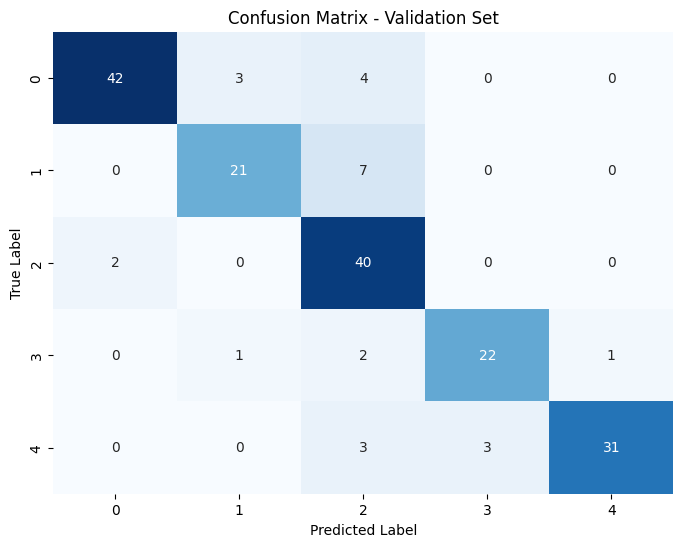

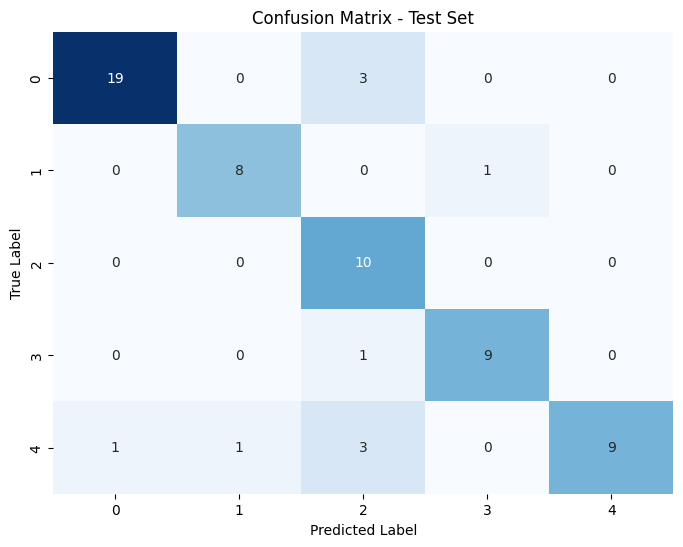

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for validation set
conf_matrix_val = confusion_matrix(original_labels_val, validation_predictions)

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(original_labels_test, test_predictions)

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


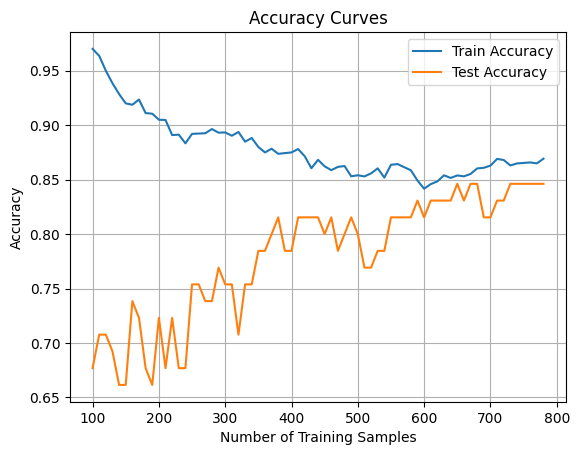

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Function to calculate accuracy for given data and labels
def calculate_accuracy(classifier, data, labels):
    predictions = classifier.predict(data)
    return accuracy_score(labels, predictions)

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []
num_samples = []

# Vary the number of training samples
for i in range(100, len(mfcc_train), 10):  # Adjust step size as needed
    # Train the classifier on the subset of training data
    svm_classifier.fit(mfcc_train[:i], original_labels_train[:i])

    # Calculate accuracies
    train_accuracy = calculate_accuracy(svm_classifier, mfcc_train[:i], original_labels_train[:i])
    test_accuracy = calculate_accuracy(svm_classifier, mfcc_test, original_labels_test)

    # Append accuracies and number of samples
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    num_samples.append(i)

# Plot accuracy curves
plt.plot(num_samples, train_accuracies, label='Train Accuracy')
plt.plot(num_samples, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install joblib
import joblib

# Path to save the trained model
model_file_path = "svm_model.pkl"

# Save the trained SVM classifier
joblib.dump(svm_classifier, model_file_path)

print("SVM model saved successfully at:", model_file_path)

SVM model saved successfully at: svm_model.pkl


In [ ]:
import joblib
import librosa
import numpy as np

# Load the pre-trained SVM classifier
svm_classifier = joblib.load("svm_model.pkl")

# Path to the audio file
audio_file_path = '/content/drive/MyDrive/Respiratory_Sound_Database/Filtered_Audio_Files/113_1b1_Lr_sc_Litt3200.wav'

label_map = {0: 'COPD', 1: 'Bronchiolitis', 2: 'Pneumonia',3: 'URTI', 4: 'Healthy'}

# Number of MFCC features
features = 52

# Load the audio file and extract MFCC features
data_x, sampling_rate = librosa.load(audio_file_path, res_type='kaiser_fast')
mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)

# Reshape the feature array
mfccs = mfccs.reshape(1, -1)

# Predict the class of the audio file
predicted_class = svm_classifier.predict(mfccs)[0]

class_name = label_map[predicted_class]

print("Predicted Class:", class_name)

Predicted Class: COPD
